In [1]:
import numpy as np
import pysindy as ps
import inspect

In [132]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [133]:
# let's create "f"
def saturated_growth(t, u, C):
    return u * (C - u)

In [244]:
# ICs and constants
u_0 = 0.01
C = 1

In [245]:
# time span. i.e. 24 months.
t_span = (0, 24)
t_eval = np.linspace(t_span[0], t_span[1], 1000) # 100 time steps

In [246]:
# solve
sol = solve_ivp(saturated_growth, t_span, [u_0], args=(C,), t_eval=t_eval)
t = sol.t
u = sol.y[0]

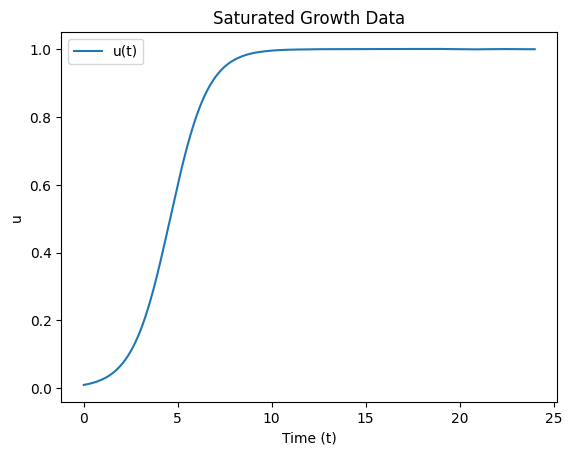

In [247]:
# plot
plt.figure()
plt.plot(t, u, label='u(t)')
plt.xlabel('Time (t)')
plt.ylabel('u')
plt.title('Saturated Growth Data')
plt.legend()
plt.show()


In [138]:
# try PySINDy

model = ps.SINDy(feature_names=["u"])
model.fit(u, t=t)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['u'],
      optimizer=STLSQ())

In [139]:
print(inspect.getsource(saturated_growth))
model.print()

def saturated_growth(t, u, C):
    return u * (C - u)

(u)' = 1.001 u + -1.001 u^2


### Let's try with noisy data

In [140]:
# add noise
u_clean = u
noise_stddev =  0.05 # Standard deviation of the Gaussian noise
noise = np.random.normal(0, noise_stddev, u_clean.shape)
u_with_noise = u_clean + noise


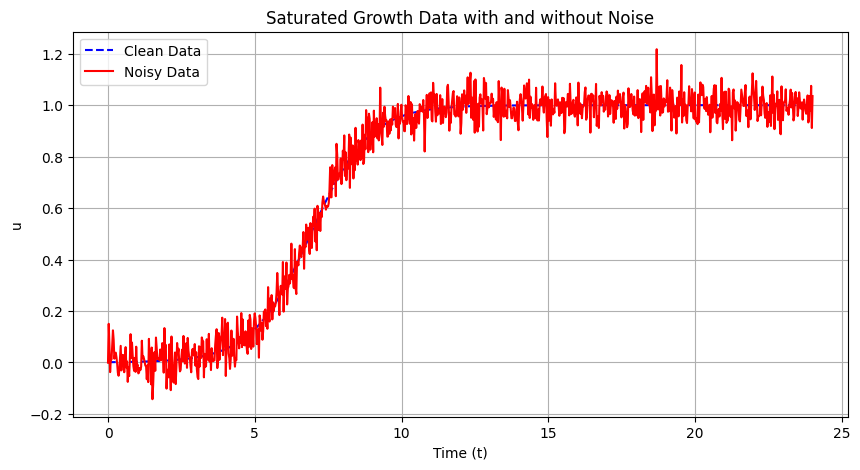

In [141]:
plt.figure(figsize=(10, 5))
plt.plot(t, u, label='Clean Data', linestyle='--', color='blue')
plt.plot(t, u_with_noise, label='Noisy Data', color='red')
plt.xlabel('Time (t)')
plt.ylabel('u')
plt.title('Saturated Growth Data with and without Noise')
plt.legend()
plt.grid(True)
plt.show()

In [160]:
# create pysindy model
# stlsq_optimizer = ps.STLSQ(threshold=0.01, alpha=0.5)
sr3_optimizer = ps.SR3(threshold=0.1, thresholder="l1")
model2 = ps.SINDy(feature_names=["u"], optimizer=sr3_optimizer)
model2.fit(u_with_noise, t=t)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['u'],
      optimizer=SR3(thresholder='l1'))

In [161]:
print(inspect.getsource(saturated_growth))
model2.print()

def saturated_growth(t, u, C):
    return u * (C - u)

(u)' = 0.692 u + -0.664 u^2


### Let's reduce the shape of u and t

In [188]:
u.shape, t.shape

((1000,), (1000,))

In [189]:
# Randomly select 10% of the data indices and sort them
random_indices = np.sort(np.random.choice(range(len(t)), size=int(0.1 * len(t)), replace=False))
u_10 = u[random_indices]
t_10 = t[random_indices]

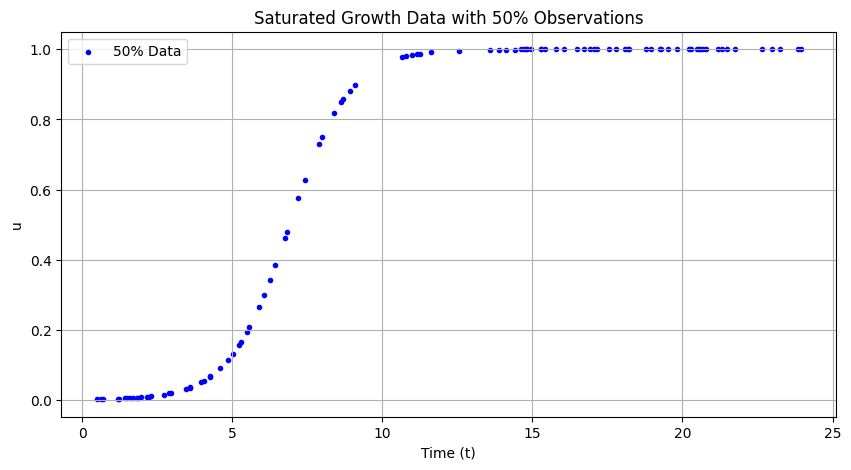

In [190]:
# Plot the 50 percent data
plt.figure(figsize=(10, 5))
#plt.plot(t, u_with_noise, label='Noisy Data', color='red', alpha=0.5)
plt.scatter(t_10, u_10, label='50% Data', color='blue', marker='.')
plt.xlabel('Time (t)')
plt.ylabel('u')
plt.title('Saturated Growth Data with 50% Observations')
plt.legend()
plt.grid(True)
plt.show()

In [191]:
sr3_optimizer = ps.SR3(threshold=0.1, thresholder="l1")
model3 = ps.SINDy(feature_names=["u"], optimizer=sr3_optimizer)
model3.fit(u_10, t=t_10)

C:\Users\tirth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pysindy\optimizers\sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(


SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['u'],
      optimizer=SR3(thresholder='l1'))

In [192]:
print(inspect.getsource(saturated_growth))
model3.print()

def saturated_growth(t, u, C):
    return u * (C - u)

(u)' = 1.000 u + -1.000 u^2


### Let's add some nose to the 10 percent of the data

In [193]:
# add noise
u_clean2 = u_10
noise_stddev =  0.05 # Standard deviation of the Gaussian noise
noise = np.random.normal(0, noise_stddev, u_clean2.shape)
u_with_noise2 = u_clean2 + noise

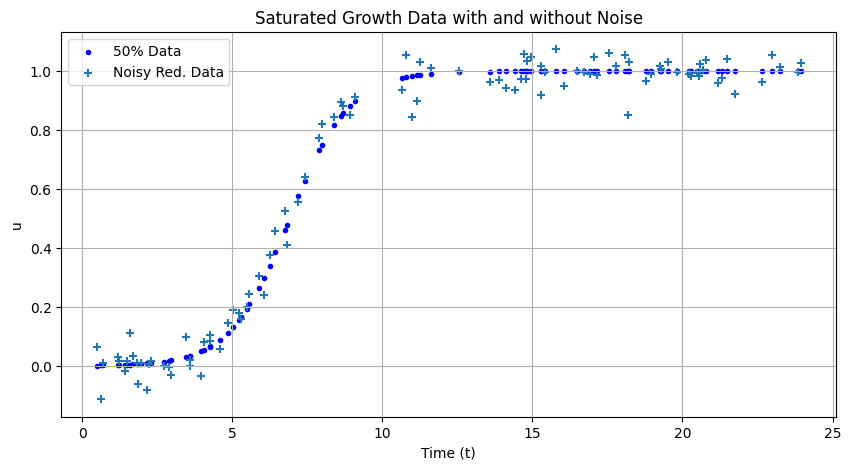

In [252]:
plt.figure(figsize=(10, 5))
#plt.plot(t_10, u_10, label='Clean Data', linestyle='--', color='blue')
plt.scatter(t_10, u_10, label='50% Data', color='blue', marker='.')
#plt.plot(t_10, u_with_noise2, label='Noisy Data', color='red')
plt.scatter(t_10, u_with_noise2, label='Noisy Red. Data', marker="+")
plt.xlabel('Time (t)')
plt.ylabel('u')
plt.title('Saturated Growth Data with and without Noise')
plt.legend()
plt.grid(True)
plt.show()

In [260]:
sr3_optimizer = ps.SR3(threshold=0.03, thresholder="l1")
model4 = ps.SINDy(feature_names=["u"], optimizer=sr3_optimizer)
model4.fit(u_with_noise2, t=t_10)

C:\Users\tirth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pysindy\optimizers\sr3.py:390: ConvergenceWarning: SR3._reduce did not converge after 30 iterations.
  warnings.warn(


SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['u'],
      optimizer=SR3(threshold=0.03, thresholder='l1'))

In [261]:
print(inspect.getsource(saturated_growth))
model4.print()

def saturated_growth(t, u, C):
    return u * (C - u)

(u)' = -0.050 1 + 0.294 u + -0.219 u^2


In [256]:
from pysindy.utils import lorenz

In [257]:
print(inspect.getsource(lorenz))

def lorenz(t, x, sigma=10, beta=2.66667, rho=28):
    return [
        sigma * (x[1] - x[0]),
        x[0] * (rho - x[2]) - x[1],
        x[0] * x[1] - beta * x[2],
    ]



In [214]:
# solve
x_train = solve_ivp(saturated_growth, t_span, [u_0], args=(C,), t_eval=t_eval).y.T